# Day_081

### 練習時間
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras
from keras.models import Sequential, Model
from keras.layers import Input, Dense
from keras import optimizers

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
# 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.regularizers import l1, l2, l1_l2
def build_mlp(input_shape, output_units = 10, num_neurons=[512, 256, 128], Regu_ratio = 1e-4):
    input_layer = Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = Dense(units = n_units, 
                                   activation = "relu", 
                                   name = "hidden_layer" + str(i+1), 
                                   kernel_regularizer = l1(Regu_ratio))(input_layer)
        else:
            x = Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer" + str(i+1),
                                   kernel_regularizer =  l1(Regu_ratio))(x)
    
    output = Dense(units = output_units, activation = "softmax", name = "output")(x)
    
    model = Model(inputs = [input_layer], outputs = [output])
    return model

In [6]:
# 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12]
L1_L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [7]:
results = {}
for regulizer_ratio in L1_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape = x_train.shape[1:], Regu_ratio = regulizer_ratio)
    model.summary()
    optimizer = optimizers.SGD(lr = LEARNING_RATE, nesterov = True, momentum = MOMENTUM)
    model.compile(loss = "categorical_crossentropy", metrics = ["accuracy"], optimizer = optimizer)

    model.fit(x_train, y_train, 
              epochs = EPOCHS, 
              batch_size = BATCH_SIZE, 
              validation_data = (x_test, y_test), 
              shuffle = True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l1-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 19s 383us/step - loss: 6.0269 - acc: 0.2704 - val_loss: 5.8245 - val_acc: 0.3440
Epoch 2/50
50000/50000 [==============================] - 19s 384us/step - loss: 5.7316 - acc: 0.3630 - val_loss: 5.6447 - val_acc: 0.3845
Epoch 3/50
50000/50000 [==============================] - 20s 395us/step - loss: 5.5822 - acc: 0.3920 - val_loss: 5.5216 - val_acc: 0.4024
Epoch 4/50
50000/50000 [==============================] - 20s 410us/step - loss: 5.4591 - acc: 0.4159 - val_loss: 5.4067 - val_acc: 0.4174
Epoch 5/50
50000/50000 [==============================] - 20s 400us/step - loss: 5.3524 - acc: 0.4275 - val_loss: 5.2990 - val_acc: 0.4348
Epoch 6/50
50000/50000 [==============================] - 20s 408us/step - loss: 5.2510 - acc: 0.4416 - val_loss: 5.2123 - val_acc: 0.4397
Epoch 7/50
50000/50000 [==============================] - 20s 397us/step - loss: 5.1577 - acc: 0.4507 - val_loss: 5.

50000/50000 [==============================] - 32s 643us/step - loss: 2.0530 - acc: 0.2649 - val_loss: 1.8860 - val_acc: 0.3387
Epoch 2/50
50000/50000 [==============================] - 31s 613us/step - loss: 1.8224 - acc: 0.3610 - val_loss: 1.7724 - val_acc: 0.3838
Epoch 3/50
50000/50000 [==============================] - 31s 613us/step - loss: 1.7382 - acc: 0.3922 - val_loss: 1.7078 - val_acc: 0.4024
Epoch 4/50
50000/50000 [==============================] - 30s 606us/step - loss: 1.6807 - acc: 0.4113 - val_loss: 1.6621 - val_acc: 0.4149
Epoch 5/50
50000/50000 [==============================] - 30s 607us/step - loss: 1.6345 - acc: 0.4290 - val_loss: 1.6175 - val_acc: 0.4348
Epoch 6/50
50000/50000 [==============================] - 31s 620us/step - loss: 1.5948 - acc: 0.4392 - val_loss: 1.5921 - val_acc: 0.4359
Epoch 7/50
50000/50000 [==============================] - 30s 609us/step - loss: 1.5598 - acc: 0.4531 - val_loss: 1.5621 - val_acc: 0.4465
Epoch 8/50
50000/50000 [==============

Epoch 2/50
50000/50000 [==============================] - 31s 613us/step - loss: 1.8105 - acc: 0.3667 - val_loss: 1.7686 - val_acc: 0.3768
Epoch 3/50
50000/50000 [==============================] - 31s 615us/step - loss: 1.7274 - acc: 0.3955 - val_loss: 1.6964 - val_acc: 0.4072
Epoch 4/50
50000/50000 [==============================] - 30s 606us/step - loss: 1.6699 - acc: 0.4144 - val_loss: 1.6460 - val_acc: 0.4214
Epoch 5/50
50000/50000 [==============================] - 31s 619us/step - loss: 1.6231 - acc: 0.4303 - val_loss: 1.6071 - val_acc: 0.4393
Epoch 6/50
50000/50000 [==============================] - 31s 617us/step - loss: 1.5844 - acc: 0.4449 - val_loss: 1.6006 - val_acc: 0.4370
Epoch 7/50
50000/50000 [==============================] - 31s 625us/step - loss: 1.5519 - acc: 0.4564 - val_loss: 1.5492 - val_acc: 0.4571
Epoch 8/50
50000/50000 [==============================] - 32s 636us/step - loss: 1.5191 - acc: 0.4693 - val_loss: 1.5348 - val_acc: 0.4555
Epoch 9/50
50000/50000 [===

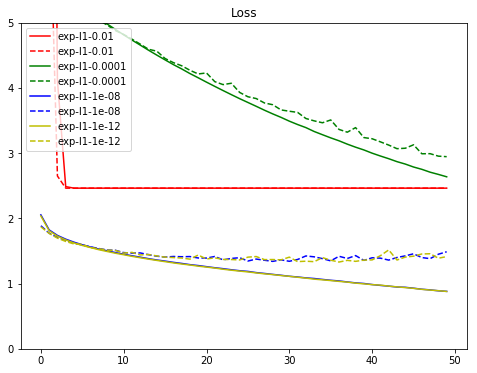

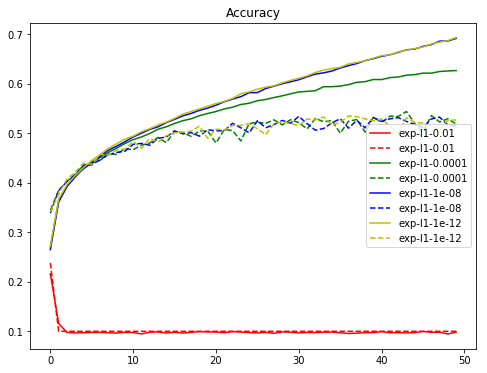

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [9]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], Regu_ratio = 1e-4):
    input_layer = Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units = n_units, 
                                   activation = "relu", 
                                   name = "hidden_layer" + str(i+1), 
                                   kernel_regularizer = l1_l2(Regu_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer" + str(i+1),
                                   kernel_regularizer =  l1_l2(Regu_ratio))(x)
    
    output = Dense(units = output_units, activation = "softmax", name = "output")(x)
    
    model = Model(inputs = [input_layer], outputs = [output])
    return model

In [10]:
results = {}
for regulizer_ratio in L1_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape = x_train.shape[1:], Regu_ratio = regulizer_ratio)
    model.summary()
    optimizer = optimizers.SGD(lr = LEARNING_RATE, nesterov = True, momentum = MOMENTUM)
    model.compile(loss = "categorical_crossentropy", metrics = ["accuracy"], optimizer = optimizer)

    model.fit(x_train, y_train, 
              epochs = EPOCHS, 
              batch_size = BATCH_SIZE, 
              validation_data = (x_test, y_test), 
              shuffle = True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l1_l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 34s 683us/step - loss: 18.8153 - acc: 0.2674 - val_loss: 17.3698 - val_acc: 0.3321
Epoch 2/50
50000/50000 [==============================] - 32s 636us/step - loss: 16.1499 - acc: 0.3557 - val_loss: 14.9871 - val_acc: 0.3695
Epoch 3/50
50000/50000 [==============================] - 32s 639us/step - loss: 13.9614 - acc: 0.3764 - val_loss: 12.9853 - val_acc: 0.3820
Epoch 4/50
50000/50000 [==============================] - 32s 646us/step - loss: 12.1106 - acc: 0.3947 - val_loss: 11.2783 - val_acc: 0.3955
Epoch 5/50
50000/50000 [==============================] - 32s 639us/step - loss: 10.5388 - acc: 0.4041 - val_loss: 9.8391 - val_acc: 0.4003
Epoch 6/50
50000/50000 [==============================] - 32s 649us/step - loss: 9.2020 - acc: 0.4096 - val_loss: 8.5948 - val_acc: 0.4131
Epoch 7/50
50000/50000 [==============================] - 32s 640us/step - loss: 8.0618 - acc: 0.4165 - val

50000/50000 [==============================] - 20s 396us/step - loss: 15.0629 - acc: 0.2701 - val_loss: 13.9353 - val_acc: 0.3343
Epoch 2/50
50000/50000 [==============================] - 19s 379us/step - loss: 12.9928 - acc: 0.3587 - val_loss: 12.0966 - val_acc: 0.3707
Epoch 3/50
50000/50000 [==============================] - 19s 383us/step - loss: 11.3211 - acc: 0.3842 - val_loss: 10.5848 - val_acc: 0.3908
Epoch 4/50
50000/50000 [==============================] - 19s 377us/step - loss: 9.9125 - acc: 0.3980 - val_loss: 9.2745 - val_acc: 0.4048
Epoch 5/50
50000/50000 [==============================] - 19s 379us/step - loss: 8.7136 - acc: 0.4101 - val_loss: 8.1775 - val_acc: 0.4083
Epoch 6/50
50000/50000 [==============================] - 19s 381us/step - loss: 7.6920 - acc: 0.4180 - val_loss: 7.2335 - val_acc: 0.4120
Epoch 7/50
50000/50000 [==============================] - 19s 382us/step - loss: 6.8217 - acc: 0.4252 - val_loss: 6.4326 - val_acc: 0.4261
Epoch 8/50
50000/50000 [========

Epoch 2/50
50000/50000 [==============================] - 19s 381us/step - loss: 13.0074 - acc: 0.3513 - val_loss: 12.1107 - val_acc: 0.3681
Epoch 3/50
50000/50000 [==============================] - 19s 382us/step - loss: 11.3328 - acc: 0.3757 - val_loss: 10.5874 - val_acc: 0.3828
Epoch 4/50
50000/50000 [==============================] - 19s 382us/step - loss: 9.9213 - acc: 0.3898 - val_loss: 9.2846 - val_acc: 0.4020
Epoch 5/50
50000/50000 [==============================] - 19s 385us/step - loss: 8.7239 - acc: 0.4015 - val_loss: 8.1808 - val_acc: 0.4072
Epoch 6/50
50000/50000 [==============================] - 19s 385us/step - loss: 7.7030 - acc: 0.4106 - val_loss: 7.2465 - val_acc: 0.4064
Epoch 7/50
50000/50000 [==============================] - 19s 381us/step - loss: 6.8326 - acc: 0.4183 - val_loss: 6.4448 - val_acc: 0.4138
Epoch 8/50
50000/50000 [==============================] - 19s 384us/step - loss: 6.0901 - acc: 0.4229 - val_loss: 5.7556 - val_acc: 0.4183
Epoch 9/50
50000/50000 

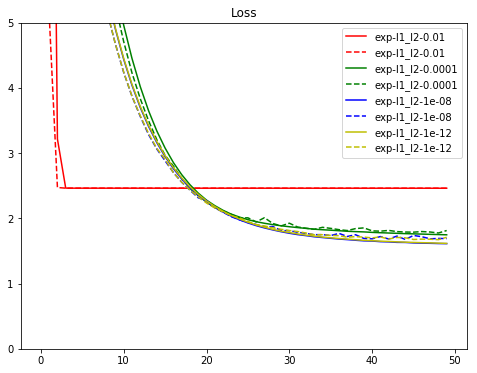

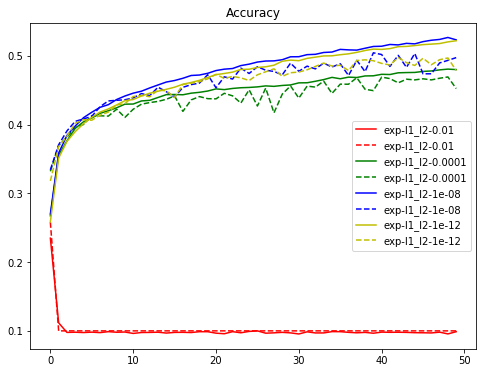

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()